In [44]:
import fastf1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import statistics
import seaborn as sns
import fastf1.plotting


In [63]:
teams =    ["Alfa Romeo",
            "AlphaTauri",
            "Alpine",
            "Aston Martin",
            "Ferrari",
            "Haas F1 Team",
            "McLaren",
            "Mercedes",
            "Red Bull Racing",
            "Williams"]

In [4]:
bahrain_race = fastf1.get_session(2023, "bahrain", "R")
bahrain_race.load(telemetry=True, laps=True, weather=True)

saudi_race = fastf1.get_session(2023, "saudi arabia", "R")
saudi_race.load(telemetry=True, laps=True, weather=True)

australia_race = fastf1.get_session(2023, "australia", "R")
australia_race.load(telemetry=True, laps=True, weather=True)

azerbaijan_race = fastf1.get_session(2023, "azerbaijan", "R")
azerbaijan_race.load(telemetry=True, laps=True, weather=True)

miami_race = fastf1.get_session(2023, "miami", "R")
miami_race.load(telemetry=True, laps=True, weather=True)

monaco_race = fastf1.get_session(2023, "monaco", "R")
monaco_race.load(telemetry=True, laps=True, weather=True)

spain_race = fastf1.get_session(2023, "spain", "R")
spain_race.load(telemetry=True, laps=True, weather=True)

canada_race = fastf1.get_session(2023, "canada", "R")
canada_race.load(telemetry=True, laps=True, weather=True)

austria_race = fastf1.get_session(2023, "austria", "R")
austria_race.load(telemetry=True, laps=True, weather=True)

britain_race = fastf1.get_session(2023, "britain", "R")
britain_race.load(telemetry=True, laps=True, weather=True)

logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	Using cached data for season_schedule
core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.0.3]
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2023/1/results.json failed; using cached response
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/urllib3/connection.py", line 200, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/urllib3/util/connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/socket.py", line 962, in getaddri

In [7]:
sessions = [bahrain_race, 
            saudi_race, 
            australia_race, 
            azerbaijan_race, 
            miami_race, 
            monaco_race,
            spain_race,
            canada_race,
            australia_race,
            britain_race]

In [91]:
y = bahrain_race.laps.groupby(["Driver"]).SpeedST.mean()

race_results = [[None for i in range(len(sessions))]]
race_datas = [None for i in range(len(sessions))]

for i in range(len(sessions)):
    race_data = {
        "Name": sessions[i].results["Abbreviation"],
        "GridPosition": sessions[i].results["GridPosition"],
        "ClassifiedPosition": sessions[i].results["ClassifiedPosition"],
        "TeamId": sessions[i].results["TeamId"]
    }

    df = pd.DataFrame(race_data)
    race_datas[i] = df
    
race_results = pd.DataFrame()

In [18]:
def speed_plot(sessions):
    for session in sessions:
        y = session.laps.groupby(["Team"]).SpeedST.mean()
        fig, ax = plt.subplots()
        plt.plot(session, y)

Team
Alfa Romeo         292.057692
AlphaTauri         298.970000
Alpine             294.116279
Aston Martin       298.914894
Ferrari            297.440000
Haas F1 Team       295.397849
McLaren            291.078125
Mercedes           304.052632
Red Bull Racing    290.237624
Williams           303.741573
Name: SpeedST, dtype: float64

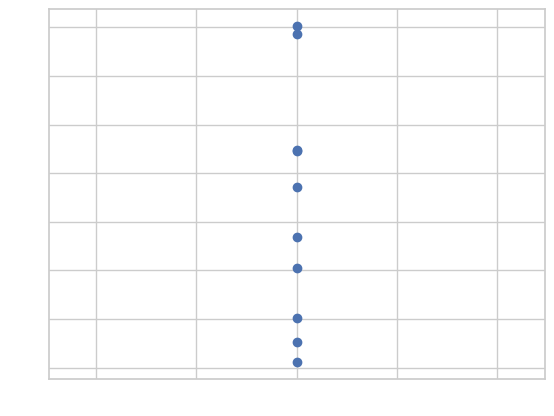

In [83]:
y = bahrain_race.laps.groupby(["Team"]).SpeedST.mean()
plt.scatter([i for k in range(len(y))], y)

In [ ]:
def lap_time_distribution(sessions):
    drivers = session.results.Abbreviation
    driver_laps = session.laps.pick_drivers(drivers).pick_quicklaps()
    driver_laps = driver_laps.reset_index()

    finishing_order = [session.get_driver(i).Abbreviation for i in drivers]

    driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv, driver in fastf1.plotting.DRIVER_TRANSLATE.items()}

    # create the figure
    fig, ax = plt.subplots(figsize=(10, 5))

    # Seaborn doesn't have proper timedelta support
    # so we have to convert timedelta to float (in seconds)
    driver_laps["LapTime(s)"] = driver_laps["LapTime"].dt.total_seconds()

    sns.violinplot(data=driver_laps,
                x="Driver",
                y="LapTime(s)",
                inner=None,
                scale="area",
                order=finishing_order,
                palette=driver_colors
                )

    sns.swarmplot(data=driver_laps,
                x="Driver",
                y="LapTime(s)",
                order=finishing_order,
                hue="Compound",
                palette=fastf1.plotting.COMPOUND_COLORS,
                hue_order=["SOFT", "MEDIUM", "HARD"],
                linewidth=0,
                size=5,
                )

    ax.set_xlabel("Driver")
    ax.set_ylabel("Lap Time")
    sns.despine(left=True, bottom=True)

    ax.legend()
    plt.suptitle(f"Lap time distribution \n "f"{session.event['EventName']} {session.event.year} Race")
    plt.figure().set_size_inches(50000, 500000, forward=True)
    fig.set_dpi(1000)

    plt.show()